In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('AirQuality.csv', delimiter=';', decimal=',')
df_copy = df.copy()

In [102]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [103]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [104]:
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# Basic Information

In [105]:
print('Shape of df is: ', df.shape)

Shape of df is:  (9471, 15)


In [106]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [108]:
df.duplicated().sum()

np.int64(113)

In [109]:
print('Duplicated rows: ', df.duplicated().sum())

Duplicated rows:  113


# Converting Date and time column to datetime type

In [110]:
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [111]:
df.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
8760,2.7,1145.0,-200.0,12.7,1074.0,393.0,593.0,163.0,1186.0,1232.0,16.5,21.6,0.4012,2005-03-10 18:00:00
7376,2.1,1174.0,-200.0,9.1,942.0,381.0,626.0,122.0,1296.0,1262.0,11.2,70.3,0.9323,2005-01-12 02:00:00
2159,3.5,1220.0,-200.0,21.4,1334.0,176.0,695.0,183.0,2066.0,1215.0,36.6,20.6,1.2445,2004-06-08 17:00:00
6997,0.8,938.0,-200.0,3.0,653.0,161.0,970.0,95.0,1100.0,747.0,12.3,60.1,0.8562,2004-12-27 07:00:00
4812,1.5,988.0,-200.0,9.0,941.0,361.0,801.0,99.0,1399.0,1035.0,14.4,60.3,0.9802,2004-09-27 06:00:00


In [112]:
# making DateTime column our index
df.set_index('DateTime', inplace=True)

In [113]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handling missing and duplicated values

In [114]:
from sklearn.impute import SimpleImputer

df.drop_duplicates(inplace=True)

imputer= SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

# Exploratory Data Analysis

# Daily average polutants levels 

C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\1573647317.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\1573647317.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\1573647317.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


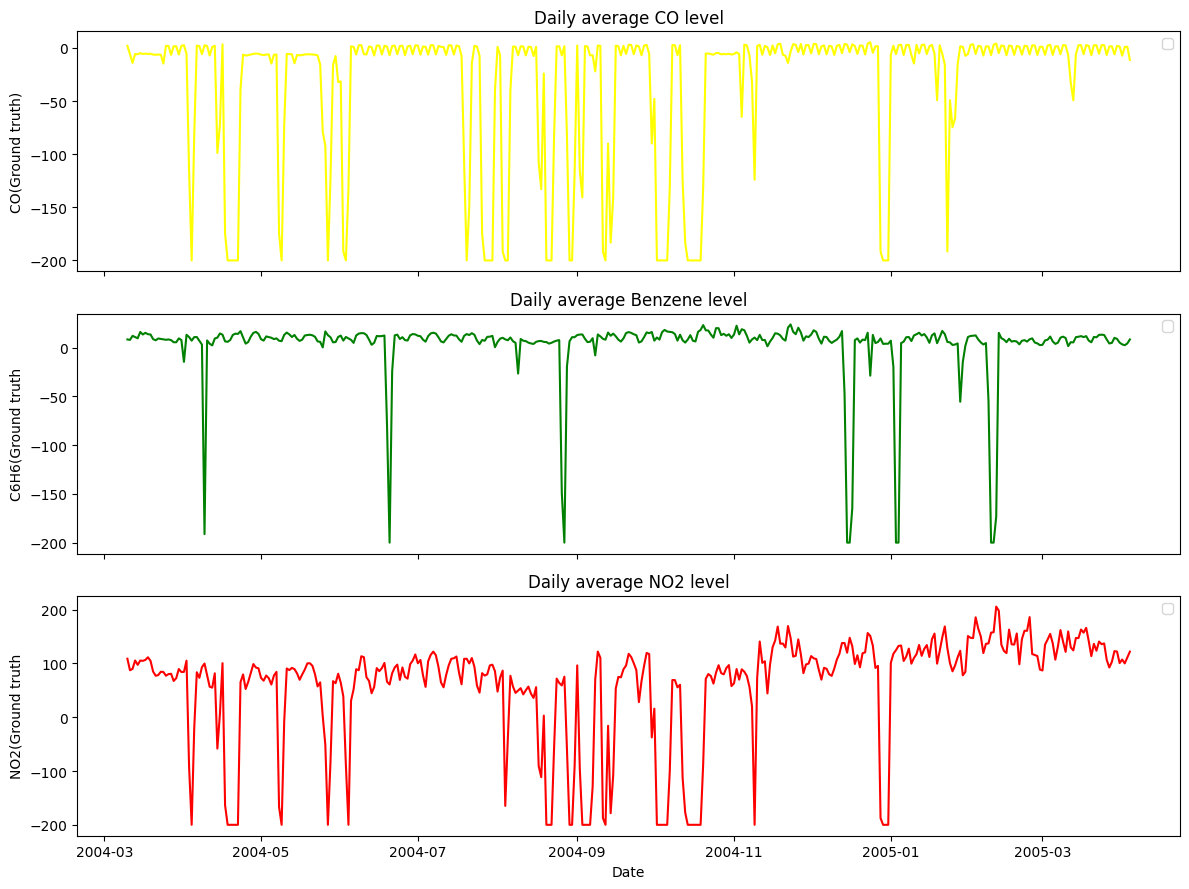

In [115]:
daily_avg = df.resample('D').mean()

fig, axes = plt.subplots(nrows= 3, ncols= 1, figsize= (12,9), sharex=True)

#CO(GT)
axes[0].plot(daily_avg.index, daily_avg['CO(GT)'], color='yellow')
axes[0].set_title('Daily average CO level')
axes[0].set_ylabel('CO(Ground truth)')
axes[0].legend()

#C6H6(GT) - Benzene
axes[1].plot(daily_avg.index, daily_avg['C6H6(GT)'], color='green')
axes[1].set_title('Daily average Benzene level')
axes[1].set_ylabel('C6H6(Ground truth')
axes[1].legend()

#NO2(GT)
axes[2].plot(daily_avg.index, daily_avg['NO2(GT)'], color='red')
axes[2].set_title('Daily average NO2 level')
axes[2].set_ylabel('NO2(Ground truth')
axes[2].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\18859651.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Monthly_avg = df.resample('M').mean()
C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\18859651.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\18859651.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
C:\Users\Abid\AppData\Local\Temp\ipykernel_19840\18859651.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


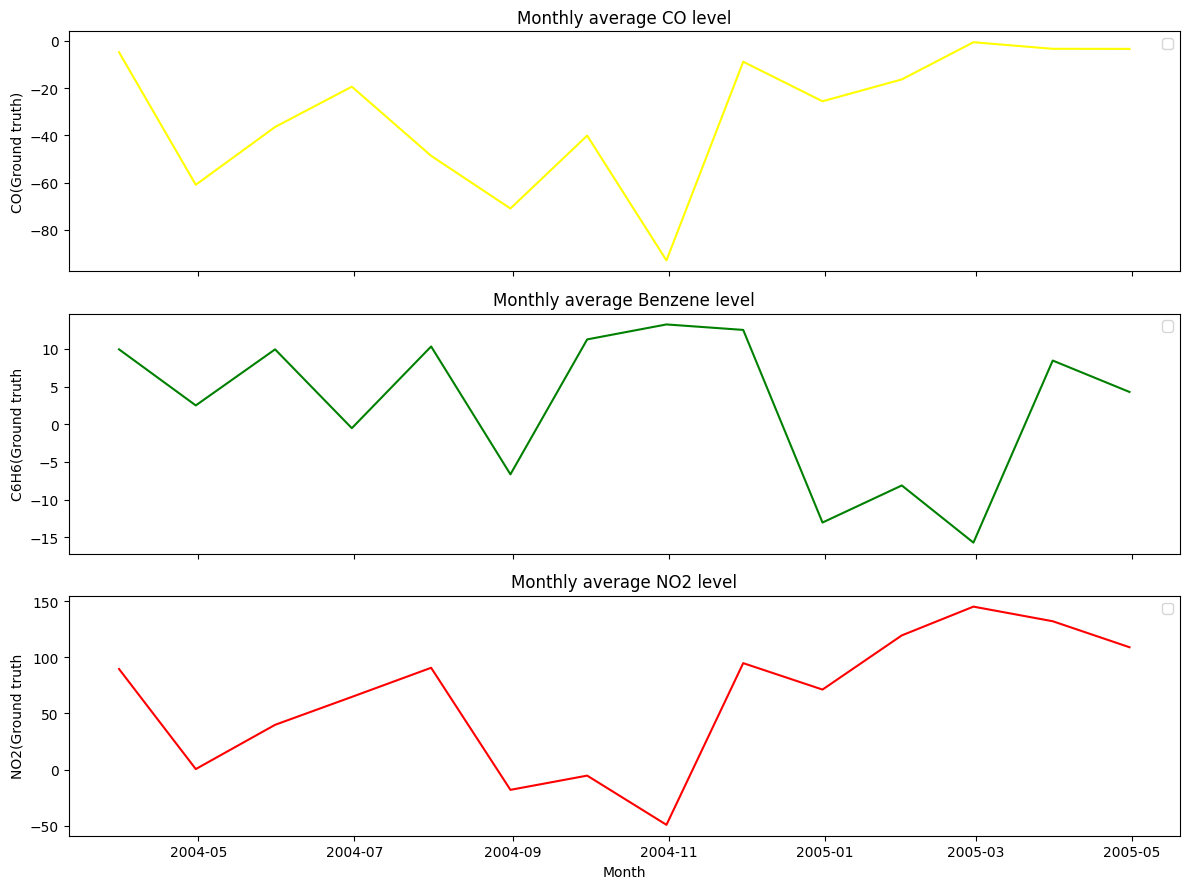

In [116]:
Monthly_avg = df.resample('M').mean()

fig, axes = plt.subplots(nrows= 3, ncols= 1, figsize= (12,9), sharex=True)

#CO(GT)
axes[0].plot(Monthly_avg.index, Monthly_avg['CO(GT)'], color='yellow')
axes[0].set_title('Monthly average CO level')
axes[0].set_ylabel('CO(Ground truth)')
axes[0].legend()

#C6H6(GT) - Benzene
axes[1].plot(Monthly_avg.index, Monthly_avg['C6H6(GT)'], color='green')
axes[1].set_title('Monthly average Benzene level')
axes[1].set_ylabel('C6H6(Ground truth')
axes[1].legend()

#NO2(GT)
axes[2].plot(Monthly_avg.index, Monthly_avg['NO2(GT)'], color='red')
axes[2].set_title('Monthly average NO2 level')
axes[2].set_ylabel('NO2(Ground truth')
axes[2].legend()

plt.xlabel('Month')
plt.tight_layout()
plt.show()

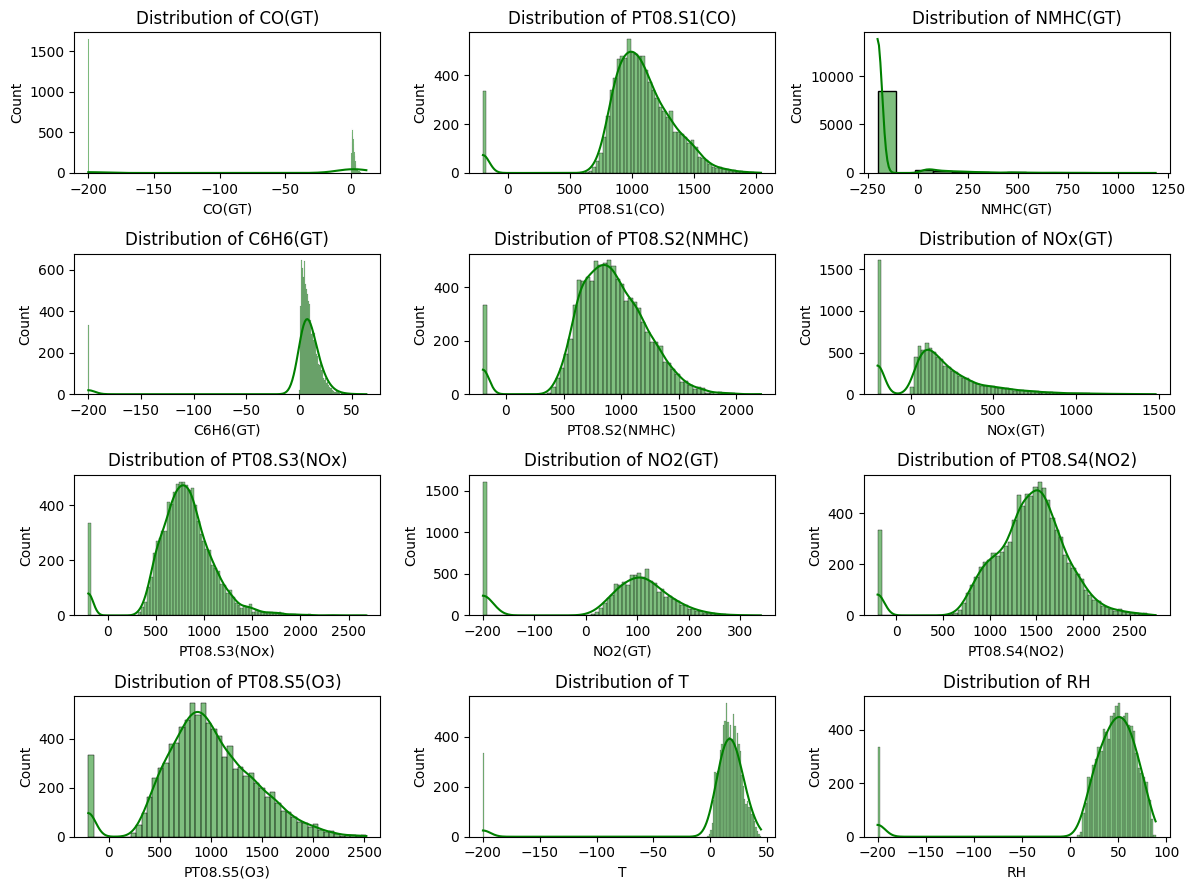

In [117]:
fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize= (12,9))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i], color= 'green')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

<Axes: >

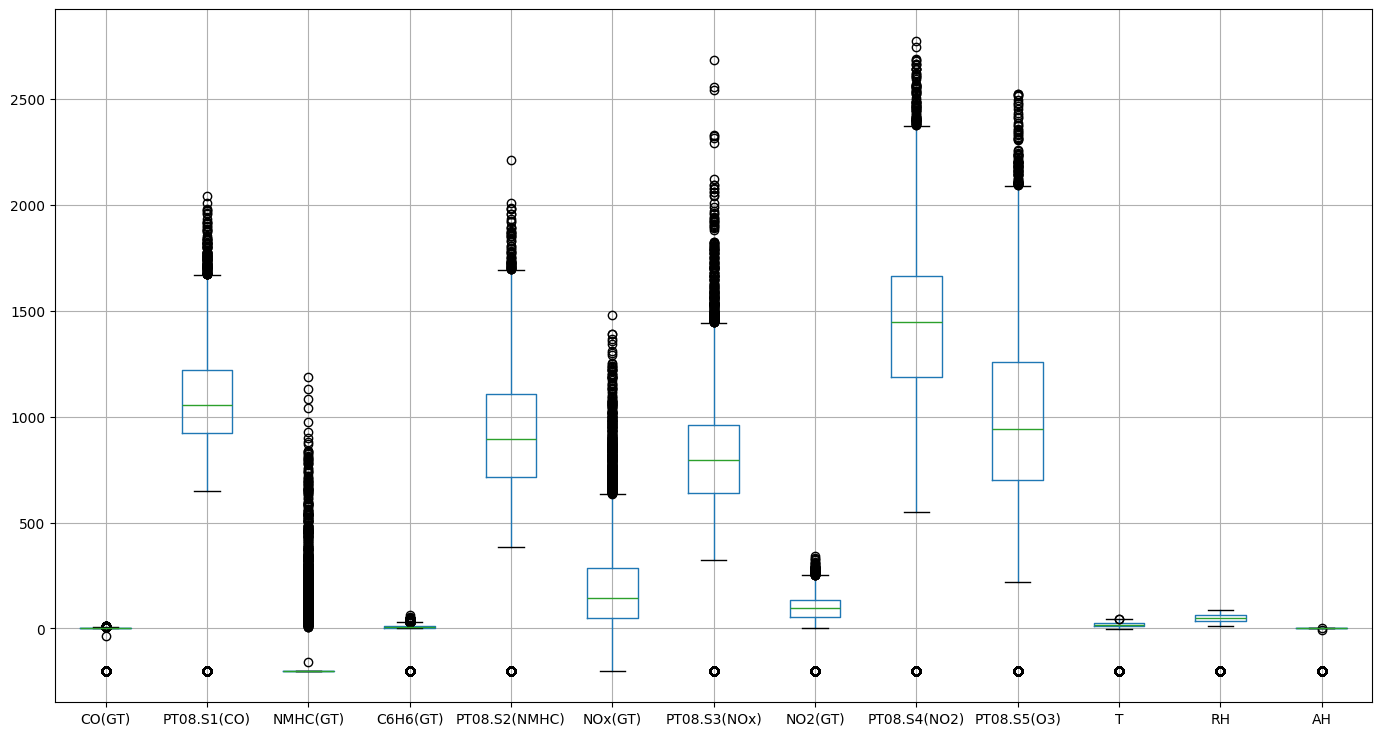

In [118]:
df.boxplot(figsize=(17,9))

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [120]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [125]:
# we will be predicting CO of the many given polutants in data

polutants = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)']
y = 'C6H6(GT)'
X = [cols for cols in df.columns if cols not in polutants]

In [122]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.469893,9.518668e-01,2.207031,2.354288e-01,0.438491,-0.014953,0.812086,4.276315e-01,6.434524e-01,6.385965e-01,0.075213,1.744780e-01,1.858699e-01
1,0.462122,7.409325e-01,1.935576,1.725694e-01,0.168452,-0.260134,1.183934,2.613089e-01,3.535797e-01,-1.541799e-02,0.067991,1.501846e-01,1.850065e-01
2,0.464712,1.082150e+00,1.764130,1.625118e-01,0.120972,-0.151165,1.076791,4.355516e-01,3.448618e-01,2.099519e-01,0.034289,2.777246e-01,1.856668e-01
3,0.464712,1.001498e+00,1.706982,1.675406e-01,0.147680,0.008397,0.925531,4.989126e-01,4.080671e-01,4.949785e-01,0.012623,3.991913e-01,1.866425e-01
4,0.456941,6.788929e-01,1.499819,9.965244e-02,-0.184676,-0.151165,1.281623,4.513919e-01,2.031947e-01,2.894942e-01,0.017438,3.910935e-01,1.866986e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,0.467303,3.407776e-01,-0.293214,2.228569e-01,0.382109,0.712805,-0.612281,9.503597e-01,-2.893709e-01,6.408060e-01,0.332794,-3.356820e-01,1.846430e-01
9323,0.467303,2.756361e-01,-0.293214,2.480006e-01,0.488938,0.479300,-0.615432,9.186792e-01,-3.394993e-01,2.497230e-01,0.395383,-4.450020e-01,1.827371e-01
9324,0.463417,-1.555385e-01,-0.293214,1.750837e-01,0.186257,0.253578,-0.303458,7.681968e-01,-7.753980e-01,-4.617387e-01,0.429085,-5.421753e-01,1.793502e-01
9325,0.464712,5.539584e-02,-0.293214,2.354288e-01,0.441458,0.370330,-0.454718,8.632383e-01,-5.836026e-01,-3.601013e-01,0.433900,-5.502731e-01,1.790535e-01


In [126]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.3, random_state=42)

models = [LinearRegression(), GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42), LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42), XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)]

for model in models:
    print(f'Training {model}.....')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'R2 Score: {r2_score(y_test,pred)}')
    print('\n')

Training LinearRegression().....
MSE: 0.0008827767608253767
RMSE: 0.029711559380574033
MAE: 0.020821259286612586
R2 Score: 0.9991064738066643


Training GradientBoostingRegressor(random_state=42).....
MSE: 1.8622857570513665e-05
RMSE: 0.004315420903053799
MAE: 0.0023004677369916566
R2 Score: 0.9999811503748485


Training LGBMRegressor(random_state=42).....
MSE: 6.540420506179063e-05
RMSE: 0.008087286631608319
MAE: 0.0016796687559249373
R2 Score: 0.9999337993783135


Training XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=